In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 

from torch import nn
from classes import *

In [2]:
with open('base dados/data1000x100.dat', 'rb') as arq:

    branch = np.load(arq)
    trunk = np.load(arq)
    target = np.load(arq)

In [3]:
trunk.shape, target.shape, branch.shape

((8000, 2), (1000, 8000), (1000, 100))

In [4]:
quantidade_camadas = 5
quantidade_neuronios = 300
amostras = 1_000

In [5]:
model = DeepONet(
    [100] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [2] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data1000x100.dat')

In [15]:
model.load(f'modelos/model{amostras}-1000.pt')
model = model.cpu()
module.evaluate()

np.float64(51.01593510009348)

73.0871552734375 70.64781829833984


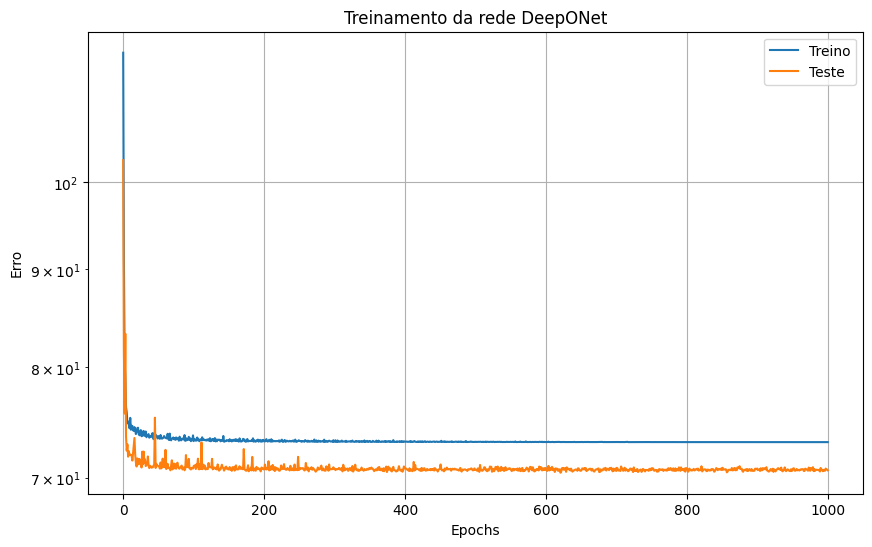

In [16]:
with open(f'modelos/trainning{amostras}-1000.dat', 'rb') as arq: loss_history = np.load(arq)

print(loss_history[0][-1], loss_history[1][-1])

fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(loss_history[0], label = 'Treino')
plt.plot(loss_history[1], label = 'Teste')

plt.title('Treinamento da rede DeepONet')
plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

In [4]:
with open('base dados/data20000.dat', 'rb') as arq:

    branch = np.load(arq)
    trunk = np.load(arq)
    target = np.load(arq)

In [5]:
trunk.shape, target.shape, branch.shape

((40000, 2), (20000, 40000), (20000, 100))

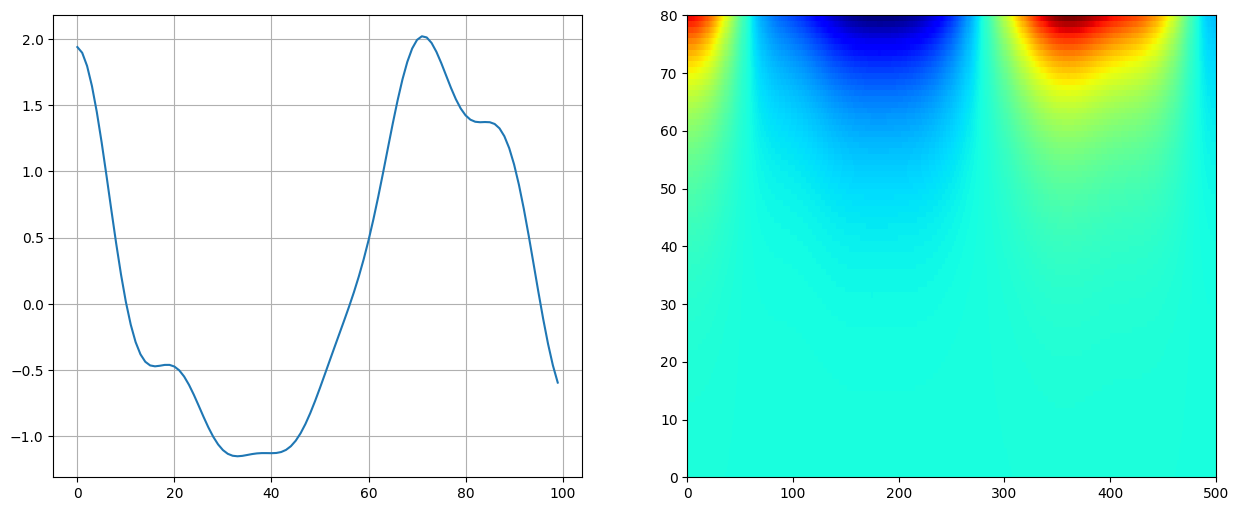

In [6]:
fig, ax = plt.subplots(ncols = 2, figsize = (15, 6))

index = 57
ax[0].plot(branch[index], label = 'Treino')
ax[0].grid()

ax[1].pcolormesh(target[index].reshape(80, 500), cmap = 'jet')

plt.show()

In [33]:
model = DeepONet(
    [100] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [2] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data20000.dat')

In [34]:
model.load(f'modelos/model{amostras}-1000.pt')
model = model.cpu()
module.evaluate()

np.float64(65.37033479503822)

In [13]:
pred, ref = module.get_results()

pred = pred.reshape(10000, 80, 500)
ref = ref.reshape(10000, 80, 500)
pred.shape, ref.shape

((10000, 80, 500), torch.Size([10000, 80, 500]))

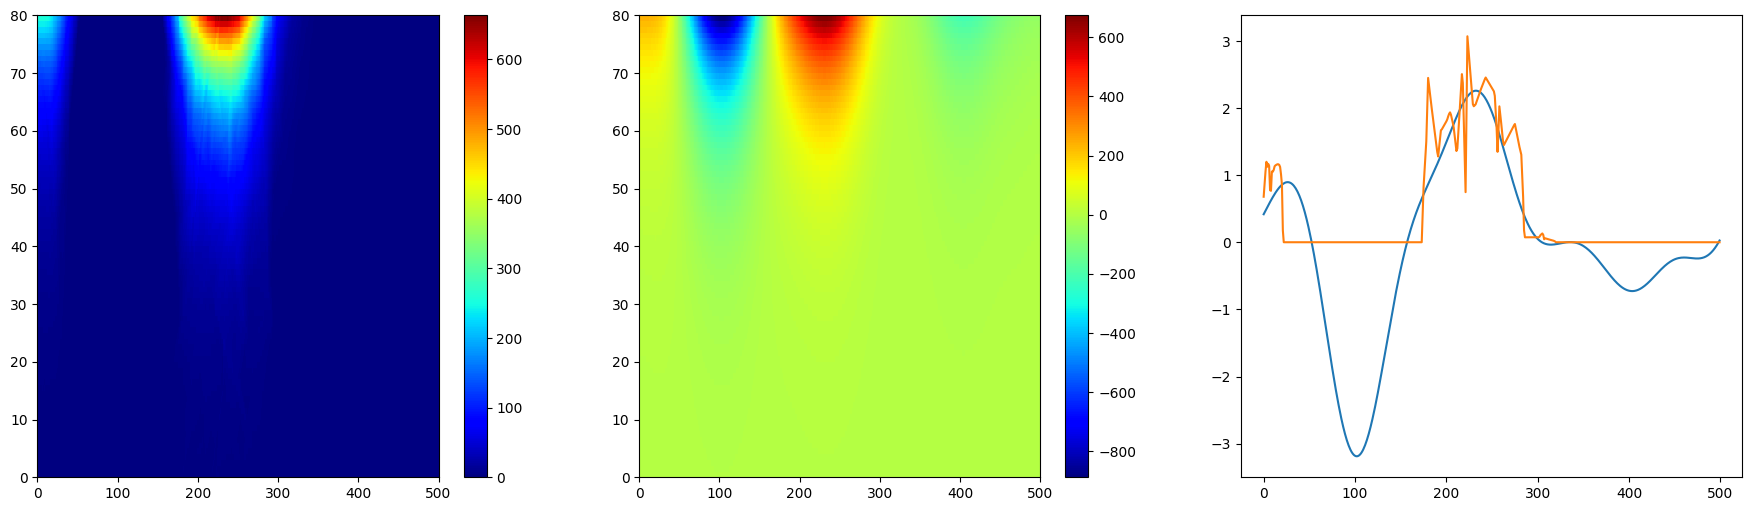

In [14]:
fig, ax = plt.subplots(ncols = 3, figsize = (22, 6))

index = 5
p1 = ax[0].pcolormesh(pred[index], cmap = 'jet')
p2 = ax[1].pcolormesh(ref[index], cmap = 'jet')
ax[2].plot(ref[index, 0])
ax[2].plot(pred[index, 0])

plt.colorbar(p1)
plt.colorbar(p2)

plt.show()

In [9]:
quantidade_camadas = 2
quantidade_neuronios = 300
amostras = 5_000

model = DeepONet(
    [100] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [2] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data20000.dat')

In [7]:
module.trainning(amostras, 'modelos2', 100, batch_size = 64)

Treinamento: 100%|██████████| 1000/1000 [01:38<00:00, 10.15it/s]


In [9]:
module.load_database('base dados/data10000.dat')
model.load(f'modelos2/model1000-1000.pt')
module.evaluate()

np.float64(132.8645594263077)

5.790531463623047 6.312091827392578


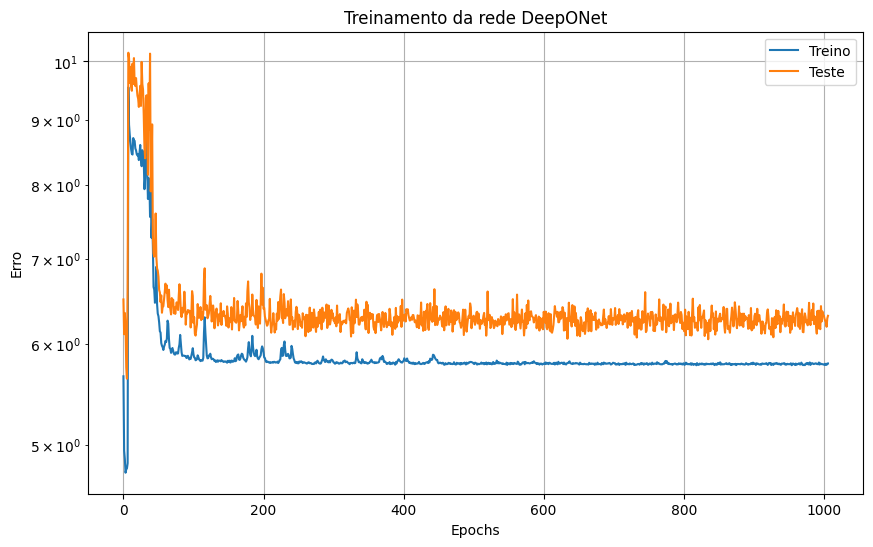

In [10]:
with open(f'modelos2/trainning{amostras}-1000.dat', 'rb') as arq: loss_history = np.load(arq)

print(loss_history[0][-1], loss_history[1][-1])

fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(loss_history[0], label = 'Treino')
plt.plot(loss_history[1], label = 'Teste')

plt.title('Treinamento da rede DeepONet')
plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.legend()
plt.yscale('log')
plt.grid()
plt.show()